Coefficients saved to coefficients.csv
Differentiated Polynomial:           4            3            2
3.12e-07 x - 3.12e-05 x + 0.001146 x - 0.02211 x - 1.411
Differentiated Coefficients saved to derivative_coefficients.csv
RMSE Score: 0.0550
slope:  -1.633306011998773


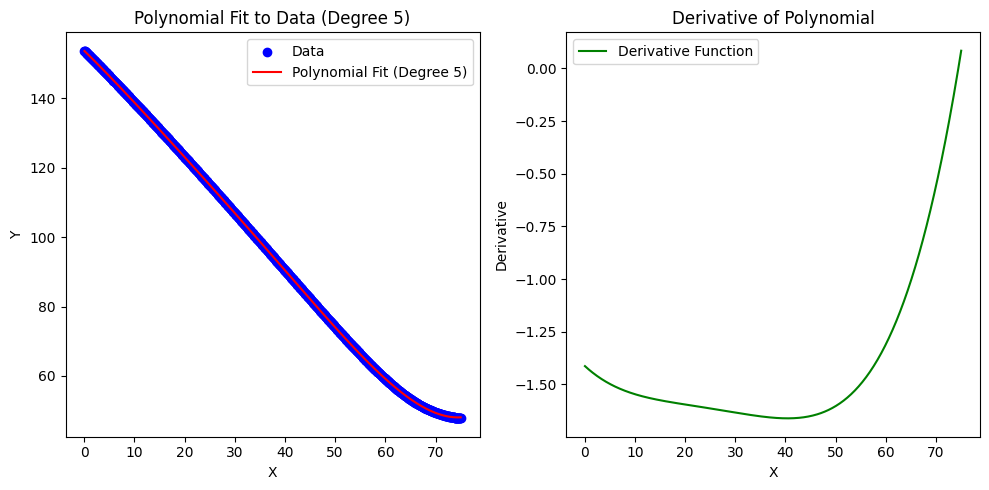

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load CSV file (data points)
data_file = r"C:\Users\divg2\OneDrive\Desktop\cable_len_vs_cam_ang.txt"  # Change this to your actual data file path
df = pd.read_csv(data_file)

# Assuming the CSV has two columns: 'x' and 'y'
x = df.iloc[:, 0].values  # First column (independent variable)
y = df.iloc[:, 1].values  # Second column (dependent variable)

# Fit a polynomial of degree 3 (Change degree as needed)
degree = 5
coefficients = np.polyfit(x, y, degree)

# Save coefficients to a CSV file
coeff_file = "coefficients.csv"
pd.DataFrame(coefficients).to_csv(coeff_file, index=False, header=False)
print(f"Coefficients saved to {coeff_file}")

# Read coefficients from the CSV file
loaded_coefficients = np.loadtxt(coeff_file, delimiter=",")
poly_func = np.poly1d(loaded_coefficients)  # Create polynomial function

# Differentiate the polynomial
derivative_func = np.polyder(poly_func)
print(f"Differentiated Polynomial: {derivative_func}")

# Save differentiated coefficients to a new CSV file
deriv_coeff_file = "derivative_coefficients.csv"
pd.DataFrame(derivative_func.coeffs).to_csv(deriv_coeff_file, index=False, header=False)
print(f"Differentiated Coefficients saved to {deriv_coeff_file}")

# Generate predicted values
y_pred = poly_func(x)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE Score: {rmse:.4f}")

# Generate fitted curve
x_fit = np.linspace(min(x), max(x), 500)
y_fit = poly_func(x_fit)

# Generate derivative values
y_deriv_fit = derivative_func(x_fit)

print("slope: ", derivative_func(30))
# Plot the original polynomial fit
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, label="Data", color="blue")
plt.plot(x_fit, y_fit, color='red', label=f"Polynomial Fit (Degree {degree})")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title(f"Polynomial Fit to Data (Degree {degree})")

# Plot the derivative
plt.subplot(1, 2, 2)
plt.plot(x_fit, y_deriv_fit, color='green', label="Derivative Function")
plt.xlabel("X")
plt.ylabel("Derivative")
plt.legend()
plt.title("Derivative of Polynomial")

plt.tight_layout()
plt.show()
